In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import  matplotlib.pyplot as plt
df=pd.read_csv('kmean.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

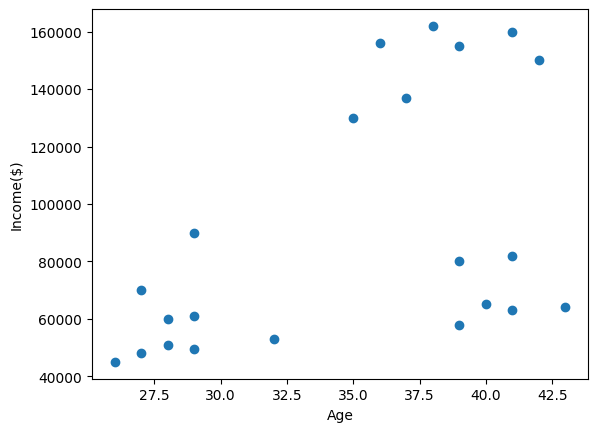

In [8]:
plt.scatter(df.Age,df[['Income($)']])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [11]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [14]:
df['cluster']=y_predicted
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

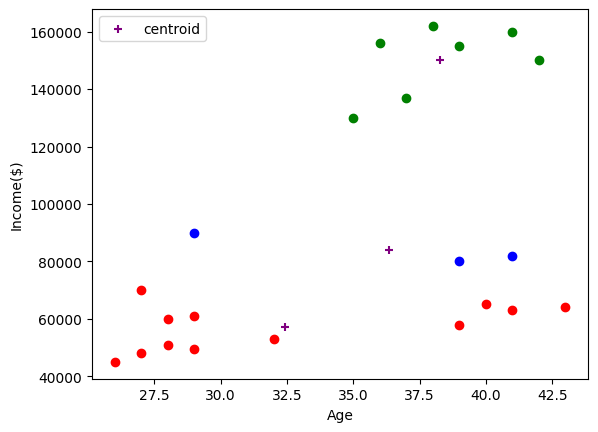

In [27]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label='centroid',color='purple',marker='+')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# preprocessing using min max scaler

In [34]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['income using minmax']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['age using minmax']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster,income using minmax,age using minmax
0,Rob,27,70000,0,0.213675,0.058824
1,Michael,29,90000,2,0.384615,0.176471
2,Mohan,29,61000,0,0.136752,0.176471
3,Ismail,28,60000,0,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176


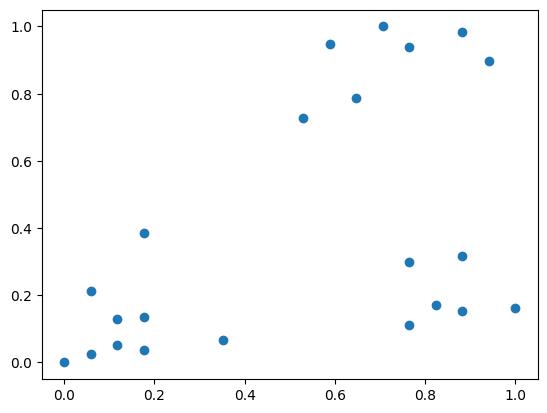

In [36]:
plt.scatter(df['age using minmax'],df['income using minmax'])

In [37]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['age using minmax','income using minmax']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [38]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster,income using minmax,age using minmax
0,Rob,27,70000,0,0.213675,0.058824
1,Michael,29,90000,0,0.384615,0.176471
2,Mohan,29,61000,0,0.136752,0.176471
3,Ismail,28,60000,0,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176


In [39]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

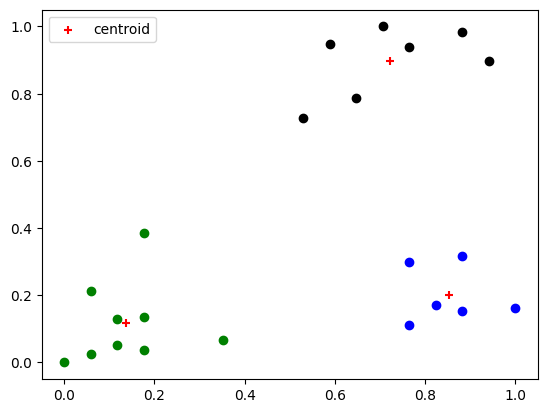

In [47]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['age using minmax'],df1['income using minmax'],color='green')
plt.scatter(df2['age using minmax'],df2['income using minmax'],color='black')
plt.scatter(df3['age using minmax'],df3['income using minmax'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label='centroid',color='red',marker='+')
plt.legend()

# k means on iris

In [80]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
iris=load_iris()

In [81]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [82]:
df['flower']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [83]:
df.drop(df[['sepal length (cm)','sepal width (cm)','flower']],axis=1,inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


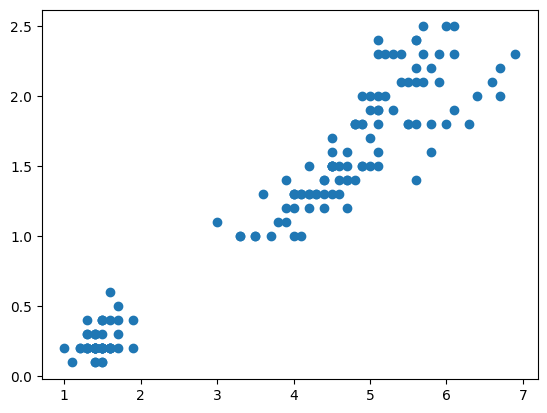

In [84]:
plt.scatter(df[['petal length (cm)']],df[['petal width (cm)']])

In [85]:
km=KMeans(n_clusters=3)
yp=km.fit_predict(df)
df['cluster']=yp
df.cluster.unique()

array([1, 2, 0])

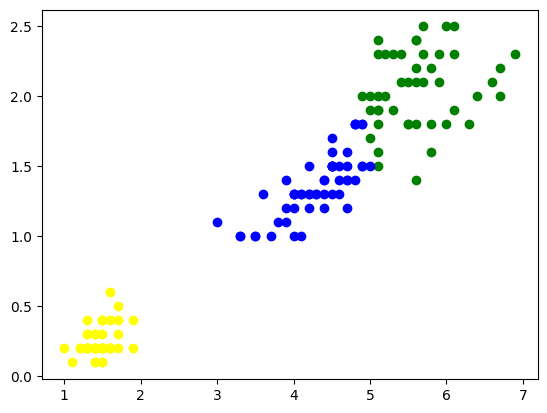

In [86]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='yellow')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')